# fMRI-Simulations


## Summary

.. 
#### demonstrations of noise etc.. 
.. and signals.. 

#### experiment 1.. 

Goal: 
. 

In [20]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [21]:
%load_ext rmagic

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [22]:
%%R
source('Scripts_fMRI_Simulations.R')


## Process Figures 

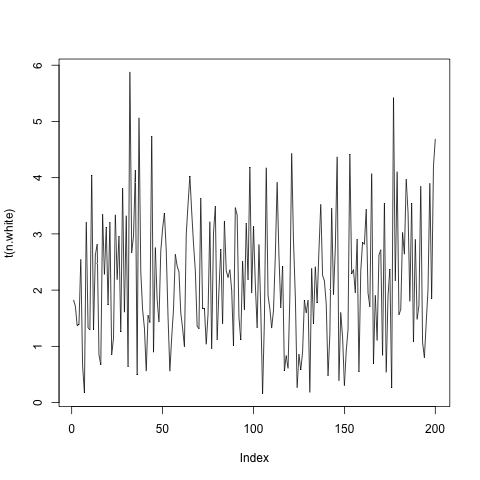

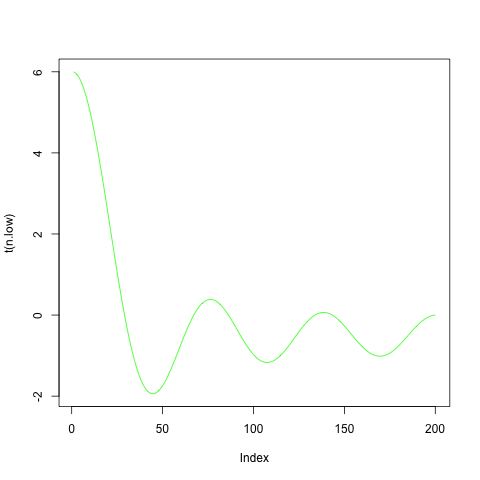

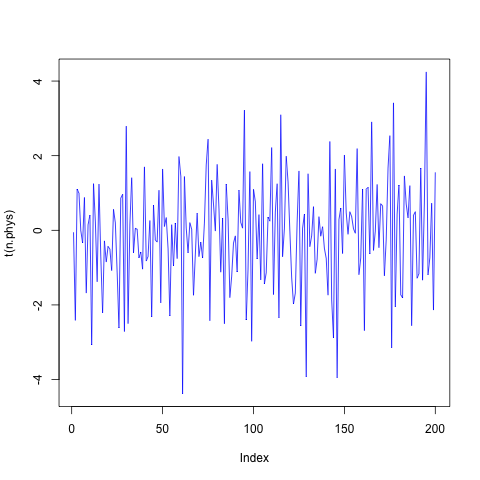

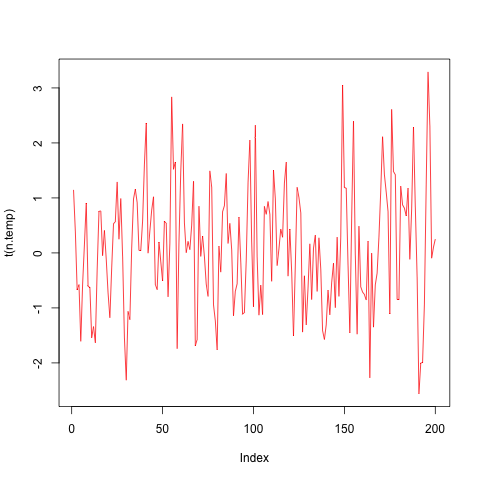

In [23]:
%%R
source('Scripts_fMRI_Simulations.R')
sigma=1
n.white <- systemnoise(dim = 1, nscan = 200, sigma = sigma, type = "rician")
n.low <- lowfreqdrift(dim =1, nscan =  200, TR = 2, freq = 120)
n.phys <- physnoise(dim = 1, nscan =  200, sigma = sigma, TR = 2)
n.temp <- temporalnoise(dim = 1, sigma =sigma, nscan = 200, rho = c(0.4, -0.2))
plot(t(n.white),type='l')
plot(t(n.low),type='l',col='green')
plot(t(n.phys),type='l',col='blue')
plot(t(n.temp),type='l',col='red')


## Example Data Set (High Signal to Noise)

In [24]:
%%R -o mapYmean,mapEmean,mapB,underlay,dim1,dim2
design=list()
design$conditions = c(1,2)
design$TRS = 200
design$TRsec = 2
design$iti=c(1,3) # min max
design<-generate_event_design(design)


## Choose locations..  

map<-list()
map$dim2<-98
map$dim1<-98
map$coords = list(c(40,20),c(30,30),c(60,30),c(60,40))
map$radius = c(10,5,5,2) # chagne the fade its too narrow.. 
map$which.b = list(c(1),c(2),c(1),c(1)) # only one per now.. correspond to rows in design matri
map$maskname<-"mask.txt"
map$underlayname<-"underlay.txt"
map$SNR=5
map$weights<-c(.5,0,0,0,.5) #system, .., .., .., spatial 
map<-generate_regions_signal(design,map)

# some output for python plotting #
mapYmean<-apply(map$map.ts.Y,2,mean)
#mapXB<-map$map.ts.XB
mapEmean<-apply(map$map.ts.E,2,mean)
mapB<-map$map.B
underlay<-map$underlay
dim1<-map$dim1
dim2<-map$dim2

[1] "signal correlation"
[1] 0.2441265


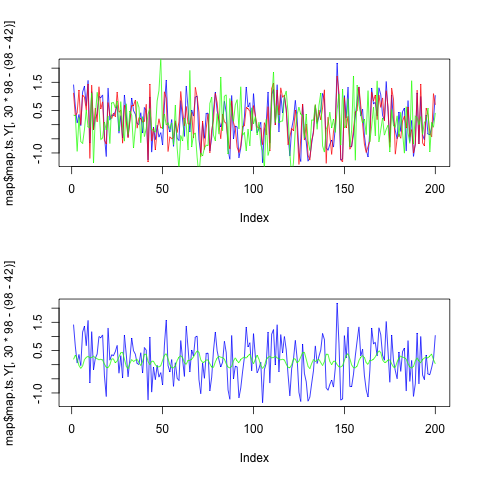

In [25]:
%%R
par(mfrow=c(2,1))
plot(map$map.ts.Y[,30*98-(98-42)],type='l',col='blue')
lines(map$map.ts.Y[,30*98-(98-41)],type='l',col='red')
lines(map$map.ts.Y[,30*98-(98-50)],type='l',col='green')

# Signal to Noise... 
plot(map$map.ts.Y[,30*98-(98-42)],type='l',col='blue')
lines(map$map.ts.XB[,30*98-(98-42)],type='l',col='green')

print('signal correlation')
print(cor(map$map.ts.XB[,30*98-(98-42)],map$map.ts.Y[,30*98-(98-42)]))


<matplotlib.colorbar.Colorbar instance at 0x1143832d8>

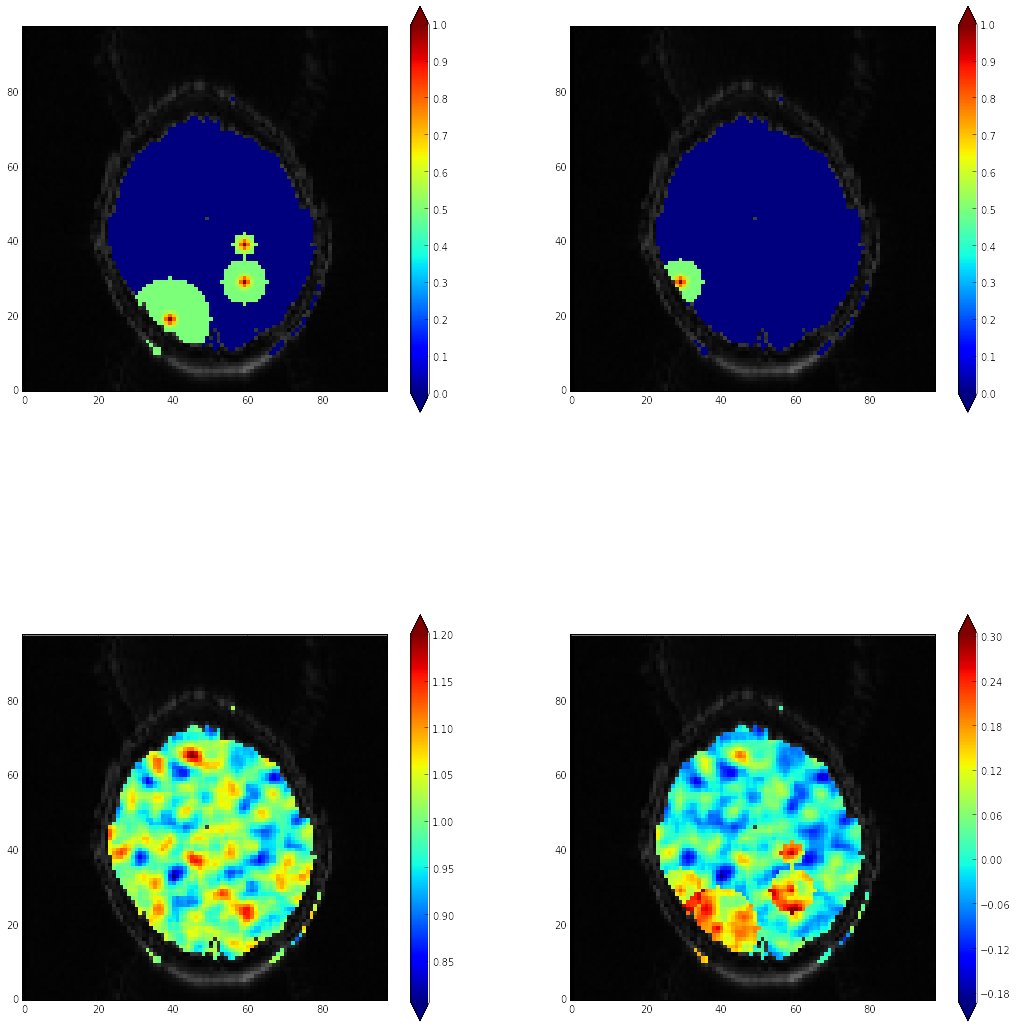

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


dim1=98
dim2=98
mapB=np.array(mapB)
mapYmean=np.array(mapYmean)
mapEmean=np.array(mapEmean)
underlay=np.array(underlay)

plt.figure(figsize=(18,20))

palette = cm.jet
palette.set_bad(alpha = 0.0)
#palette._lut[:,-1]=.8

palette2 = cm.gray
palette2.set_bad(alpha = 0.0)


### Signal 1
plt.subplot(2,2,1)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapB[:,0],(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar( extend='both', orientation='vertical', shrink=0.8)


### Signal 2
plt.subplot(2,2,2)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapB[:,1],(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar( extend='both', orientation='vertical', shrink=0.8)


### Noise
plt.subplot(2,2,3)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapEmean,(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar( extend='both', orientation='vertical', shrink=0.8)


### Noise
plt.subplot(2,2,4)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapYmean,(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar( extend='both', orientation='vertical', shrink=0.8)




## Example Data Set (Low Signal to Noise)

In [30]:
%%R -o mapYmean,mapEmean,mapB,underlay,dim1,dim2
design=list()
design$conditions = c(1,2)
design$TRS = 200
design$TRsec = 2
design$iti=c(1,3) # min max
design<-generate_event_design(design)


## Choose locations..  

map<-list()
map$dim2<-98
map$dim1<-98
map$coords = list(c(40,20),c(30,30),c(60,30),c(60,40))
map$radius = c(10,5,5,2) # chagne the fade its too narrow.. 
map$which.b = list(c(1),c(2),c(1),c(1)) # only one per now.. correspond to rows in design matri
map$maskname<-"mask.txt"
map$underlayname<-"underlay.txt"
map$SNR=.1
map$weights<-c(.5,0,0,0,.5) #system, .., .., .., spatial 
map<-generate_regions_signal(design,map)

# some output for python plotting #
mapYmean<-apply(map$map.ts.Y,2,mean)
#mapXB<-map$map.ts.XB
mapEmean<-apply(map$map.ts.E,2,mean)
mapB<-map$map.B
underlay<-map$underlay
dim1<-map$dim1
dim2<-map$dim2

#### Temporal Signal

[1] "signal correlation"
[1] 0.134779


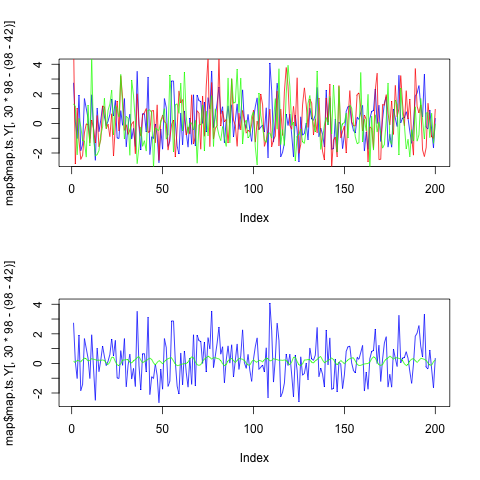

In [31]:
%%R
par(mfrow=c(2,1))
plot(map$map.ts.Y[,30*98-(98-42)],type='l',col='blue')
lines(map$map.ts.Y[,30*98-(98-41)],type='l',col='red')
lines(map$map.ts.Y[,30*98-(98-50)],type='l',col='green')

# Signal to Noise... 
plot(map$map.ts.Y[,30*98-(98-42)],type='l',col='blue')
lines(map$map.ts.XB[,30*98-(98-42)],type='l',col='green')

print('signal correlation')
print(cor(map$map.ts.XB[,30*98-(98-42)],map$map.ts.Y[,30*98-(98-42)]))


#### Spatial Signal

<matplotlib.colorbar.Colorbar instance at 0x111dfd680>

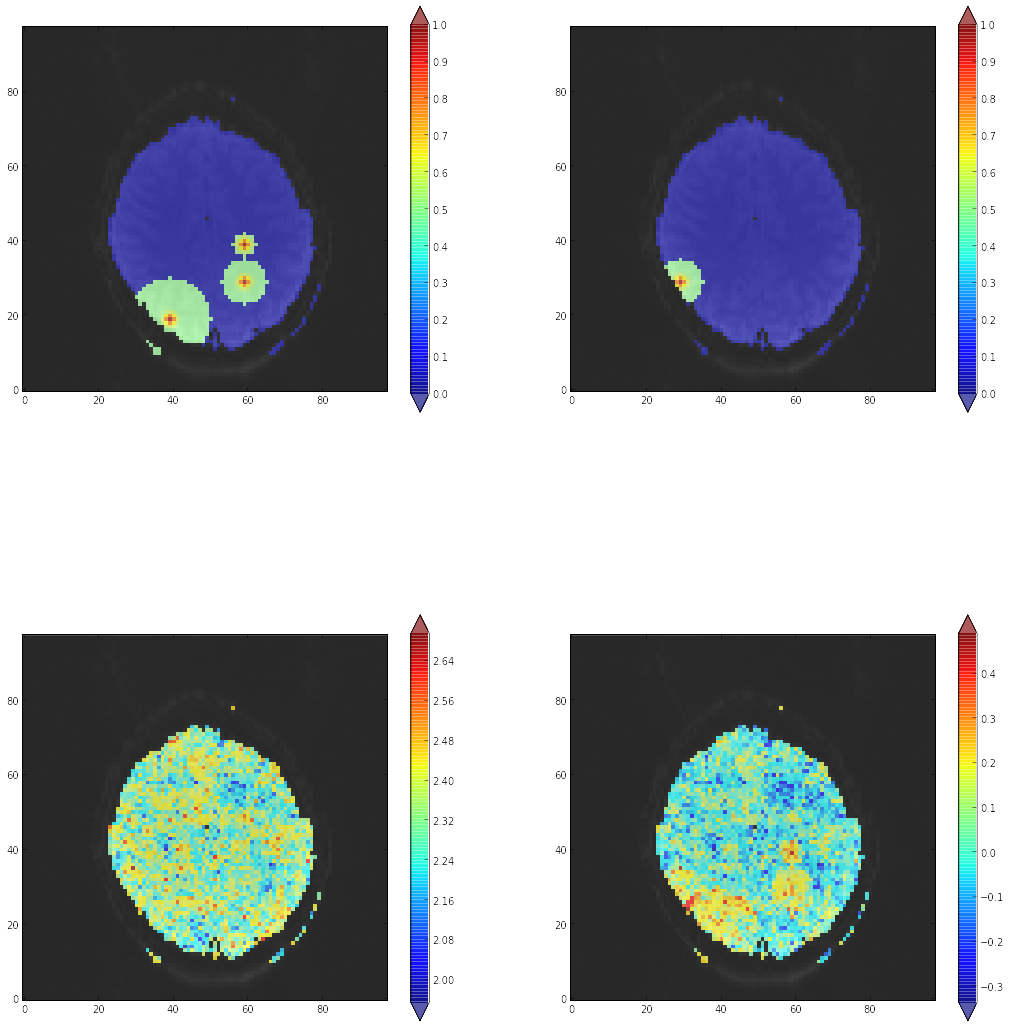

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


dim1=98
dim2=98
mapB=np.array(mapB)
mapYmean=np.array(mapYmean)
mapEmean=np.array(mapEmean)
underlay=np.array(underlay)

plt.figure(figsize=(18,20))

palette = cm.jet
palette.set_bad(alpha = 0.0)
palette._lut[:,-1]=.8

palette2 = cm.gray
palette2.set_bad(alpha = 0.0)


### Signal 1
plt.subplot(2,2,1)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapB[:,0],(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar(extend='both', orientation='vertical', shrink=0.8)


### Signal 2
plt.subplot(2,2,2)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapB[:,1],(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar( extend='both', orientation='vertical', shrink=0.8)


### Noise
plt.subplot(2,2,3)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapEmean,(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar(extend='both', orientation='vertical', shrink=0.8)


plt.subplot(2,2,4)
plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
    cmap=palette2, origin='lower')
plt.imshow(np.reshape(mapYmean,(dim1,dim2)), interpolation='none',
    cmap=palette, origin='lower')
plt.colorbar(extend='both', orientation='vertical', shrink=0.8)




# Experiment 1: Faces v Houses (Model Comparisons)

Details.. 

#### fMRI simulations... 

#### experimental set-up. 


### Search Light 

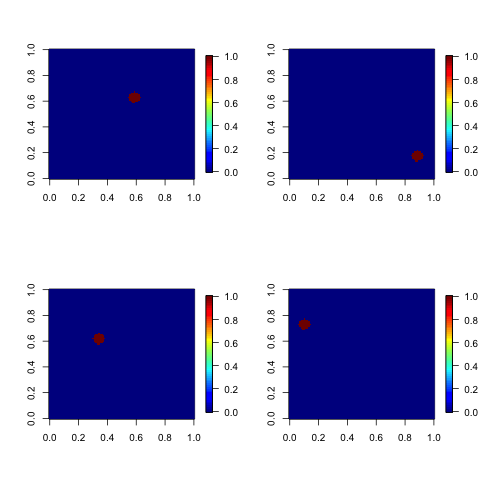

In [34]:
%%R
distrank<-data.matrix(read.table("sim_distrank.txt"))
par(mfrow=c(2,2))
for (v in seq(4)){
    dd<-matrix(0,dim1*dim2)
    dd[distrank[sample(dim1*dim2,1),]]=1
    image.plot(matrix(dd,98,98))
}


In [6]:
%%R
source('Scripts_fMRI_Simulations.R')
  ##### STUDY PARAMETERS #####
design=list()
design$conditions = c(1,2)
design$TRS = 200
design$TRsec = 2
design$iti=c(1,3) # min max
design<-generate_event_design(design)
map<-list()
map$dim2<-98
map$dim1<-98
map$coords = list(c(40,20),c(30,30),c(60,30),c(60,40)) # regions
map$radius = c(10,5,5,2) # size of gaussians 
map$which.b = list(c(1),c(2),c(1),c(1)) # conditions
map$maskname<-"mask.txt"
map$underlayname<-"underlay.txt"
map$SNR=.1 # SNR 
map$weights<-c(.5,0,0,0,.5) #noise weights (system, .., .., .., spatial) 
map$modellist=c('ols','ols.cw.gcv','ridge','ridge.cw.gcv')
map$search.size=5
results3=fmri.modelcomparisons(20,map,design)

In [35]:
%%R
save(results3,file="Sim_fmri_1.Rdata")


In [48]:
%%R
results3$df

          model    est.mse pred.mse   pred.cor SNR p   n
2           ols 0.04996979 1.740178 0.02162246 0.1 2 200
3    ols.cw.gcv 0.02613906 1.734207 0.02177956 0.1 2 200
4         ridge 0.08761646 1.751859 0.03988176 0.1 2 200
5  ridge.cw.gcv 0.04841674 1.741315 0.02424170 0.1 2 200
6           ols 0.04995946 1.616183 0.01860994 0.1 2 200
7    ols.cw.gcv 0.02636023 1.608108 0.01996921 0.1 2 200
8         ridge 0.11798914 1.641202 0.03551913 0.1 2 200
9  ridge.cw.gcv 0.06497031 1.621923 0.01933105 0.1 2 200
10          ols 0.05280743 1.605038 0.01751858 0.1 2 200
11   ols.cw.gcv 0.02896151 1.596086 0.01858869 0.1 2 200
12        ridge 0.11754737 1.627451 0.03097710 0.1 2 200
13 ridge.cw.gcv 0.06479469 1.608161 0.02045234 0.1 2 200
14          ols 0.04890868 1.729215 0.01833142 0.1 2 200
15   ols.cw.gcv 0.02615745 1.722510 0.01966765 0.1 2 200
16        ridge 0.13144598 1.756795 0.03629031 0.1 2 200
17 ridge.cw.gcv 0.07648666 1.738959 0.02023378 0.1 2 200
18          ols 0.04149518 1.38

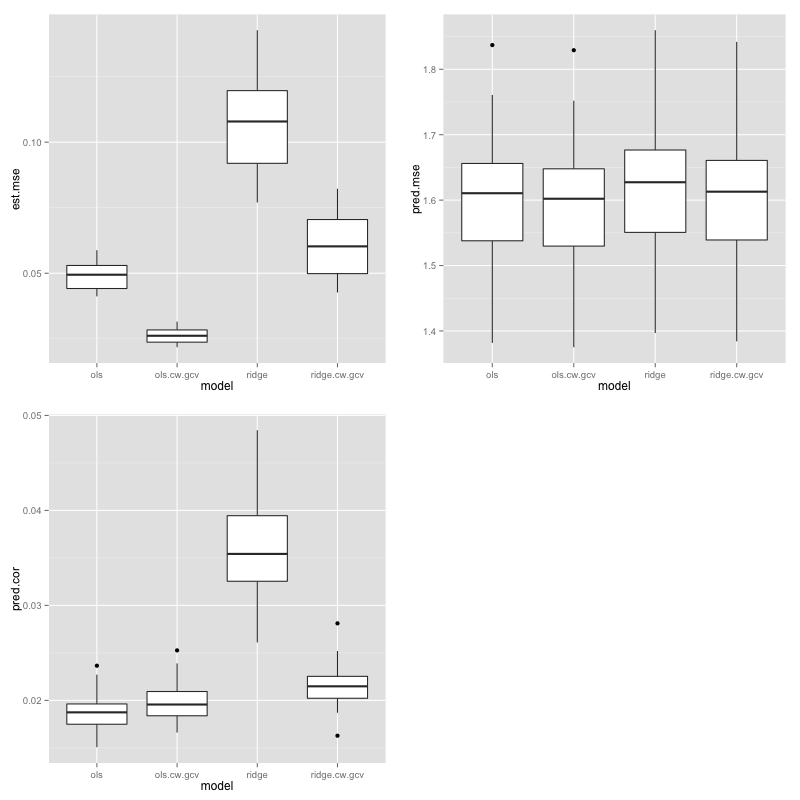

In [37]:
%%R -h 800 -w 800
library(gridExtra)
df<-results3$df
p1<-ggplot(data=df,aes(x=model,y=est.mse))+geom_boxplot()
p2<-ggplot(data=df,aes(x=model,y=pred.mse))+geom_boxplot()
p3<-ggplot(data=df,aes(x=model,y=pred.cor))+geom_boxplot()
grid.arrange(p1,p2,p3, nrow = 2, ncol = 2)

In [38]:
%%R -o mapsBhat,underlay
mapsBhat<-results3$maps.Bhat
underlay<-results3$underlay

In [42]:
%%R
dim(mapsBhat)

[1] 98 98  2  4 20


### Individual Subject Brain (assuming they have identical responses)

(98, 98, 2, 4, 20)


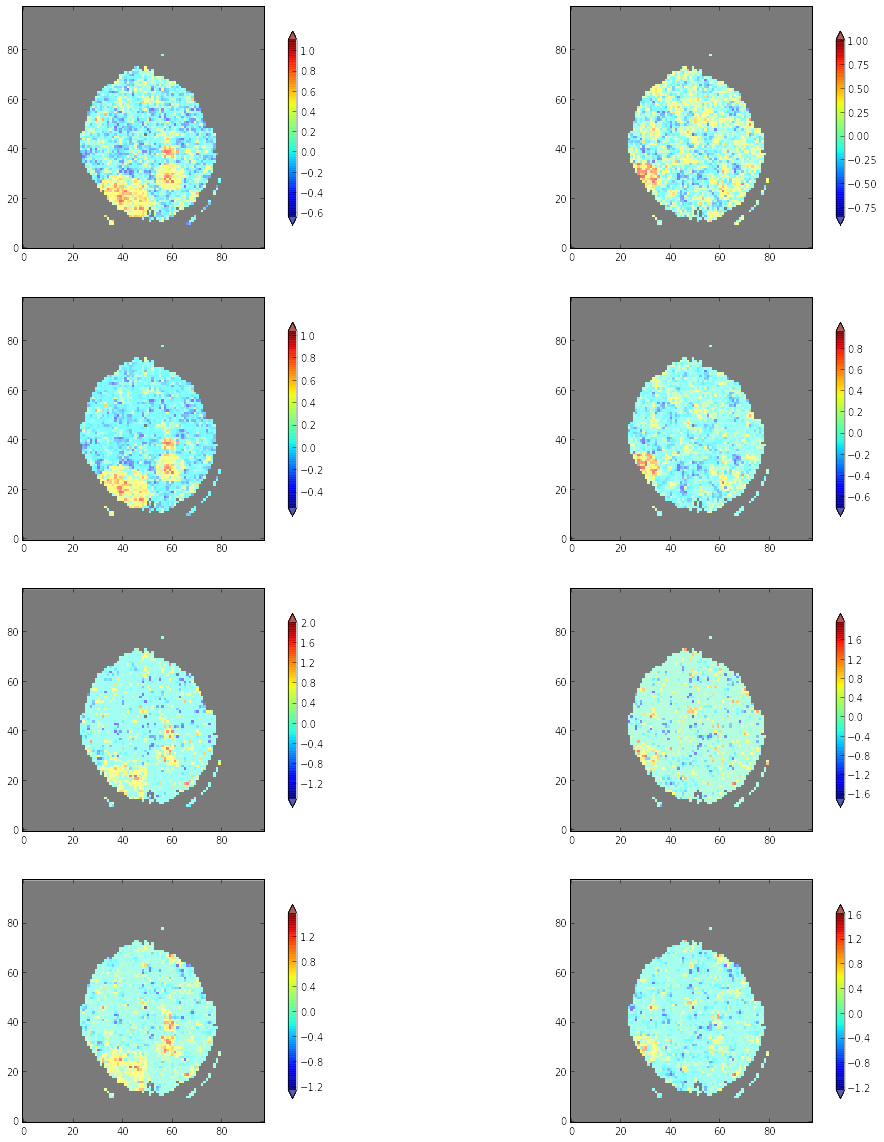

In [45]:
import numpy as np
dim1=98
dim2=98
mapsBhat=np.array(mapsBhat)
print(np.shape(mapsBhat))
#mapYmean=np.array(mapYmean)

averageit=0


cc=1
plt.figure(figsize=(18,20))
for model in [0,1,2,3]:
    for b in range(2):
        plt.subplot(4,2,cc)
        #plt.imshow(np.reshape(underlay,(dim1,dim2)), interpolation='none',
        #cmap=palette2, origin='lower')
        
        # average
        if averageit:
            plt.imshow(np.mean(mapsBhat[:,:,b,model,:].T,axis=0), interpolation='none',
            cmap=palette, origin='lower')
            plt.colorbar(extend='both', orientation='vertical', shrink=0.8)
            cc=cc+1
        else:
            plt.imshow(mapsBhat[:,:,b,model,1].T, interpolation='none',
            cmap=palette, origin='lower')
            plt.colorbar(extend='both', orientation='vertical', shrink=0.8)
            cc=cc+1
